<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_43_Decision_Tree_(Decision_Tree_Regressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement

In this data, we have one indepenedent variable 'Temperature' and one depenedent variable 'Revenue'. You have to build a Decision Tree Regressor to study the relationship b/w the two variables of the ICE CREAM shop and then predict the revenue for the ICE CREAM shop based on the temperature on a particular day.

# Importing the Dataset

Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature V/s Revenue')

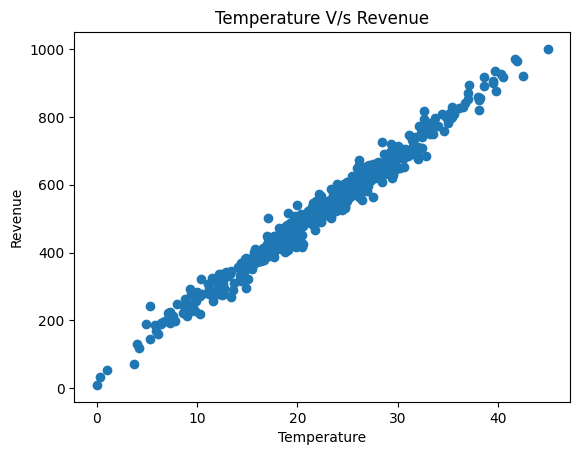

In [8]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature V/s Revenue')

In [9]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<Axes: >

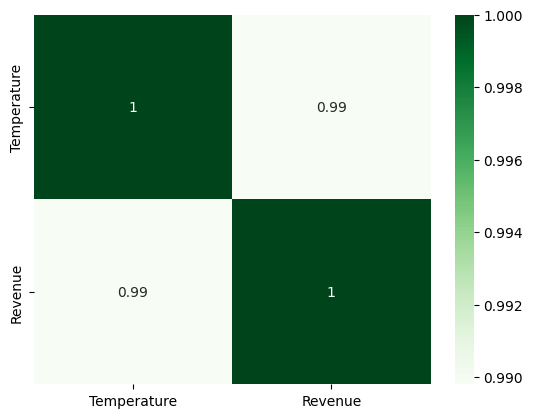

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

<Axes: >

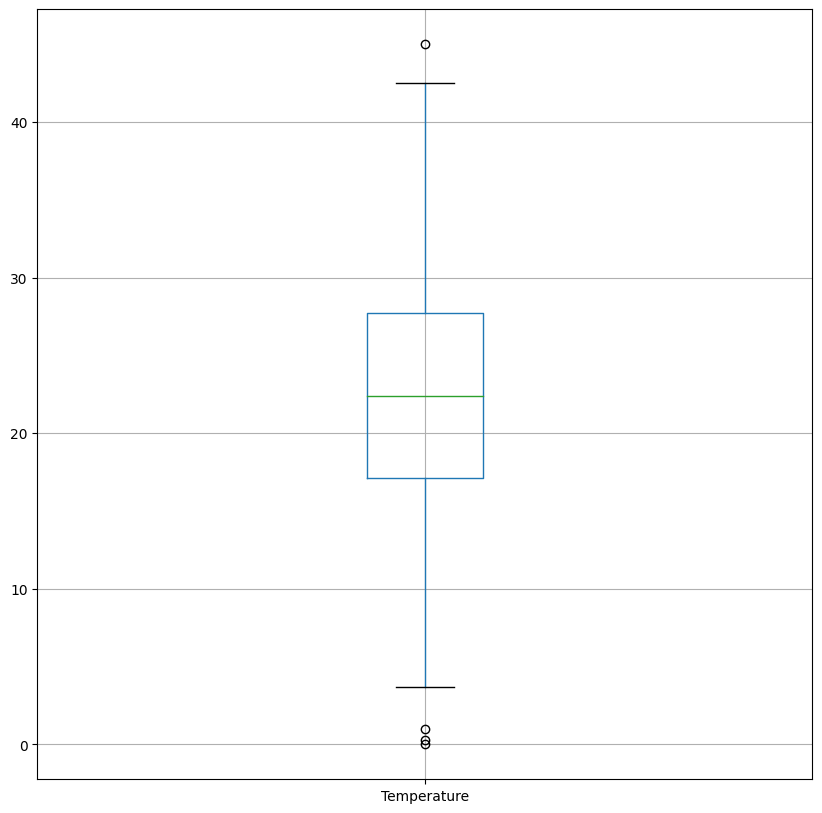

In [11]:
plt.figure(figsize=(10,10))
df[['Temperature']].boxplot()

In [13]:
#UB - 42
#LB - 4

In [15]:
#(0)4 - (42) 45

<Axes: >

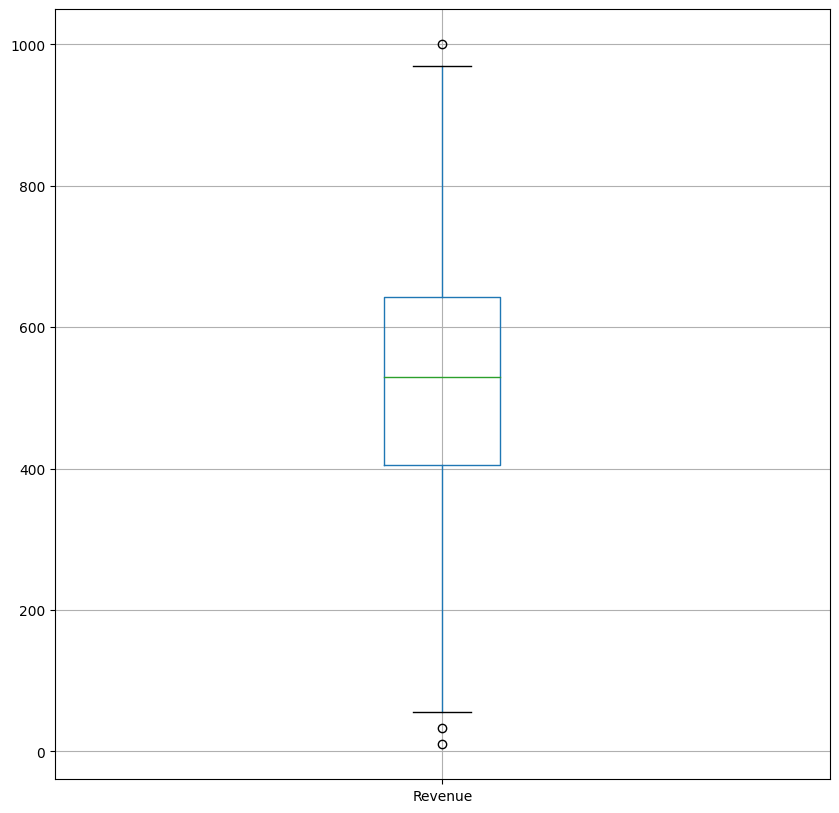

In [16]:
plt.figure(figsize=(10,10))
df[['Revenue']].boxplot()

# Spliting the dataset

In [17]:
X = df[['Temperature']]
y = df.Revenue

In [18]:
X.ndim

2

In [19]:
y.ndim

1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
len(X_train)

400

In [22]:
len(X_test)

100

# Model Selection

In [23]:
decision = DecisionTreeRegressor()
linear = LinearRegression()

# Model Training

In [24]:
decision.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
linear.fit(X_train, y_train)

LinearRegression()

# Testing the model

In [26]:
linear_y_pred = linear.predict(X_test)

In [27]:
decision_y_pred = decision.predict(X_test)

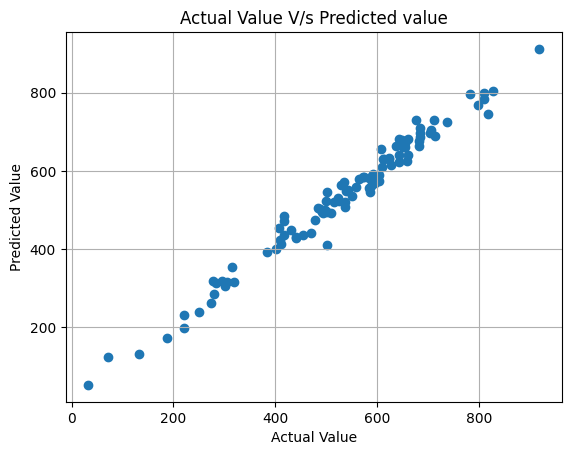

In [28]:
# Actual Value V/s Predicted value for Linear regression
plt.scatter(y_test, linear_y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value V/s Predicted value')
plt.grid()

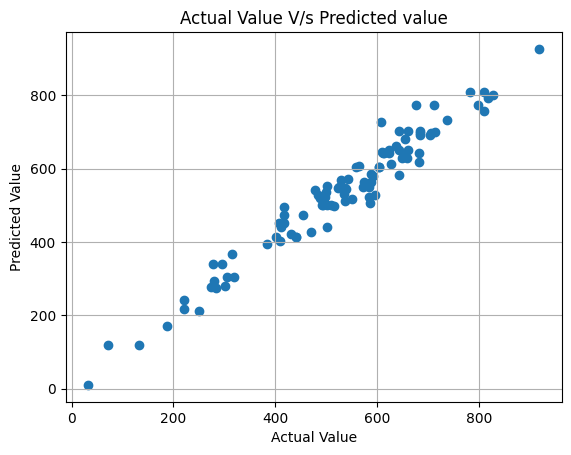

In [29]:
# Actual Value V/s Predicted value for Decision Tree
plt.scatter(y_test, decision_y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value V/s Predicted value')
plt.grid()

In [30]:
newdf_linear = pd.DataFrame({"Actual": y_test,
                             "Predicted": linear_y_pred})

In [31]:
newdf_decision = pd.DataFrame({"Actual": y_test,
                             "Predicted": decision_y_pred})

<Axes: >

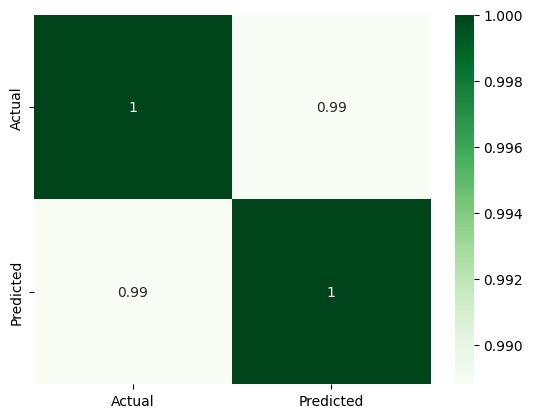

In [32]:
sns.heatmap(newdf_linear.corr(), annot=True, cmap='Greens')

<Axes: >

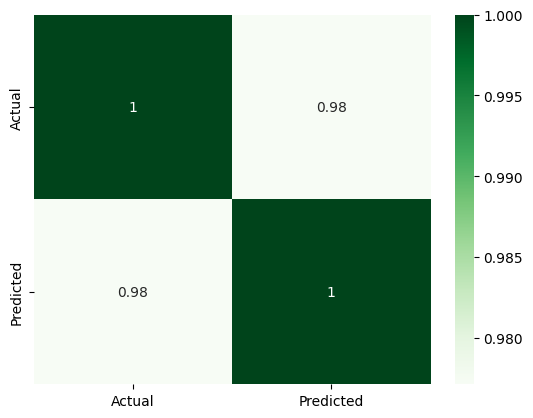

In [33]:
sns.heatmap(newdf_decision.corr(), annot=True, cmap='Greens')

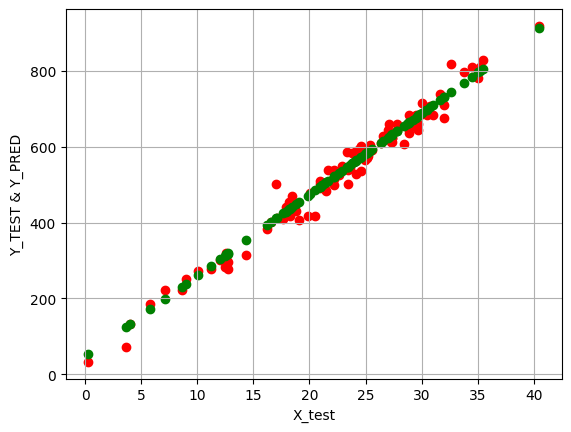

In [34]:
plt.scatter(X_test, y_test, c='r')
plt.scatter(X_test, linear_y_pred, c='green')
plt.xlabel('X_test')
plt.ylabel('Y_TEST & Y_PRED')
plt.grid()

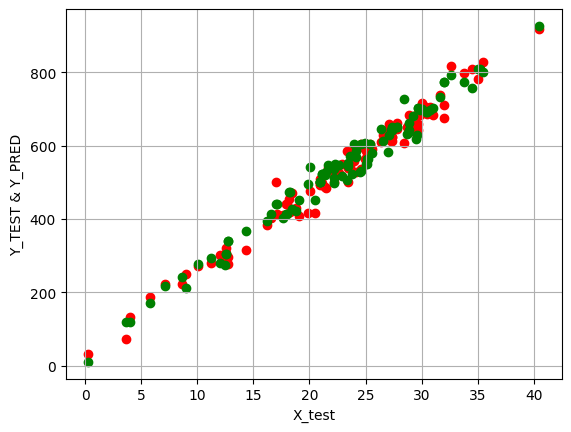

In [35]:
plt.scatter(X_test, y_test, c='r')
plt.scatter(X_test, decision_y_pred, c='green')
plt.xlabel('X_test')
plt.ylabel('Y_TEST & Y_PRED')
plt.grid()

# Checking the Performance

In [36]:
f"Linear Regression Accuracy: {r2_score(y_test, linear_y_pred)}"

'Linear Regression Accuracy: 0.9771532792713993'

In [37]:
f"Decision Tree Accuracy: {r2_score(y_test, decision_y_pred)}"

'Decision Tree Accuracy: 0.9534772958686918'

In [39]:
"""
LR - 98
DT - 95
"""

'\nLR - 98\nDT - 95\n'

In [40]:
linear.predict([[35]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


795.1737262127506

In [41]:
linear.predict([[35.1]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


797.3119235982801

In [42]:
decision.predict([[35]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


807.5412872

In [43]:
decision.predict([[35.1]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


807.5412872